In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd
from brokenaxes import brokenaxes

In [2]:
dates = list()
names = ['The Daily Progress', 'WHSV', 'The College Fix', 'The Christian Perspective', 
         'Washington Examiner', 'The Hill', 'Fox News', 'RT', 'Daily Caller']

dates_orig = ["11-06-2019 09:26", "11-08-2019 14:11","11-11-2019 05:05", "11-11-2019 13:15" , 
              "11-11-2019 13:20", "11-11-2019 18:41" ,"11-11-2019 20:42", "11-11-2019 21:59",
              "11-11-2019 22:14"]
for i in dates_orig:
    date_object = datetime.strptime(i, '%m-%d-%Y %H:%M')
    print(date_object)
    dates.append(date_object)
print(dates)

2019-11-06 09:26:00
2019-11-08 14:11:00
2019-11-11 05:05:00
2019-11-11 13:15:00
2019-11-11 13:20:00
2019-11-11 18:41:00
2019-11-11 20:42:00
2019-11-11 21:59:00
2019-11-11 22:14:00
[datetime.datetime(2019, 11, 6, 9, 26), datetime.datetime(2019, 11, 8, 14, 11), datetime.datetime(2019, 11, 11, 5, 5), datetime.datetime(2019, 11, 11, 13, 15), datetime.datetime(2019, 11, 11, 13, 20), datetime.datetime(2019, 11, 11, 18, 41), datetime.datetime(2019, 11, 11, 20, 42), datetime.datetime(2019, 11, 11, 21, 59), datetime.datetime(2019, 11, 11, 22, 14)]


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


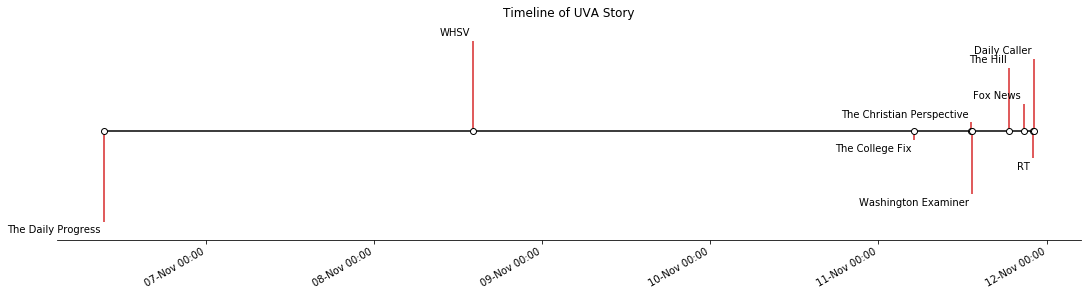

In [3]:
# Choose some nice levels
levels = np.tile([-10, 10, -1, 1, -7, 7, 3, -3, 8, -8],
                 int(np.ceil(len(dates)/6)))[:len(dates)]


# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set(title="Timeline of UVA Story")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.DayLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%d-%b %H:%M"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)

plt.show()

In [4]:
import matplotlib
matplotlib.axes.Axes.stem
matplotlib.axes.Axes.annotate
matplotlib.axis.Axis.set_major_locator
matplotlib.axis.Axis.set_major_formatter
matplotlib.dates.MonthLocator
matplotlib.dates.DateFormatter

matplotlib.dates.DateFormatter

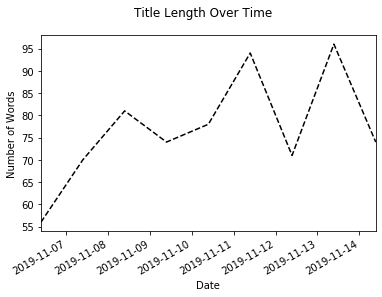

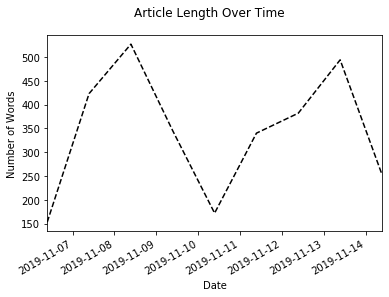

In [5]:

title_len = [56, 70,81, 74, 78, 94, 71, 96, 74]
content_len = [153, 423, 527, 345, 172, 340, 382, 494, 253]

ts = pd.Series(title_len, index=pd.date_range(dates[0], periods=len(dates), freq="1D"))
fx = ts.plot(style='k--')#, label='Number of Words')
plt.suptitle("Title Length Over Time")
fx.set_xlabel("Date")
fx.set_ylabel("Number of Words")
plt.show()
ts = pd.Series(content_len, index=pd.date_range(dates[0], periods=len(dates), freq="1D"))
fx = ts.plot(style='k--')#, label='Number of Words')
plt.suptitle("Article Length Over Time")
fx.set_xlabel("Date")
fx.set_ylabel("Number of Words")
plt.show()
